# Aula 19 - Tópicos Avançados em Deep Learning: Ensembles em Deep Learning


# 1 - Introdução aos Ensembles
Ensemble Learning é uma técnica fundamental em machine learning que envolve combinar vários modelos para formar um modelo melhor e mais robusto. A principal ideia é que a combinação de diversos modelos reduz erros que um modelo único poderia fazer. Esse método é especialmente útil em problemas complexos onde um único modelo pode não ser suficiente para capturar todas as nuances dos dados.

### Definição de Ensemble Learning

Ensemble Learning, ou aprendizado de conjunto, refere-se ao processo de construir e combinar vários modelos de machine learning (geralmente chamados de "weak learners") para resolver um problema específico com melhor desempenho do que os modelos individuais. Os modelos combinados são capazes de produzir previsões mais precisas e são geralmente mais robustos a variações nos dados de entrada.

### Importância dos Ensembles

#### 1. Redução de Variância

A variância é uma medida de quão sensível um modelo é em relação às flutuações nos dados de treinamento. Modelos com alta variância podem se ajustar demais aos dados de treinamento (overfitting), resultando em um desempenho pobre em dados novos. Os ensembles podem mitigar esse risco ao média as previsões de vários modelos, reduzindo a influência de outliers ou de características ruidosas nos dados.

#### 2. Melhoria na Generalização

Ensembles ajudam a melhorar a habilidade de generalização dos modelos ao combinar as forças e diminuir as fraquezas de cada modelo individual. Isso é particularmente útil em aplicações práticas onde os modelos precisam performar bem em dados que eles não viram durante o treinamento.

#### 3. Prevenção de Overfitting

Overfitting é uma das armadilhas mais comuns em machine learning, onde um modelo aprende detalhes e ruídos nos dados de treinamento até um ponto em que prejudica o desempenho em dados novos. A utilização de ensembles é uma estratégia eficaz para prevenir o overfitting, pois a combinação de múltiplos modelos tende a suavizar os erros que um modelo individual poderia cometer.

# 2 - Tipos de Ensembles


## 2.1 - Tipos de Ensembles Bagging (Bootstrap Aggregating)

Bagging, ou Bootstrap Aggregating, é uma das técnicas de ensemble mais comuns e eficazes usadas em machine learning para melhorar a estabilidade e a precisão de algoritmos de aprendizado. O conceito central do Bagging é simples: aumentar a diversidade dos dados de treinamento utilizados por cada modelo, para reduzir a variância sem aumentar o viés.

### Definição de Bagging

Bagging é um método de ensemble que visa melhorar o desempenho de modelos de machine learning reduzindo sua variância. O procedimento básico consiste em:

1. Gerar múltiplos subconjuntos de dados de treinamento a partir do conjunto original, utilizando amostragem com reposição (bootstrap).
2. Treinar um modelo (geralmente do mesmo tipo) em cada um desses subconjuntos.
3. Combinar as previsões desses modelos por meio de votação majoritária (para classificação) ou média (para regressão).

### Importância do Bagging

- **Redução de Variância**: Ao usar diferentes conjuntos de dados para treinar cada modelo, o bagging reduz a chance de que os modelos capturem o ruído específico de um conjunto de treinamento, resultando em um modelo final mais estável e robusto.
- **Melhoria na Generalização**: Modelos treinados em diferentes conjuntos de dados tendem a aprender diferentes "visões" dos dados, aumentando a generalização quando combinados.

## Exemplos Típicos de Bagging

### Random Forest

- **Conceito**: Random Forest é um exemplo clássico de aplicação do Bagging. Consiste em uma coleção de árvores de decisão, cada uma treinada com um subconjunto diferente dos dados.
- **Funcionamento**: Cada árvore de decisão na floresta é construída a partir de um conjunto de dados aleatoriamente selecionado. A previsão final é feita com base na agregação das previsões de todas as árvores (média ou votação majoritária).
- **Vantagens**: Além de reduzir a variância, Random Forest é menos suscetível a overfitting em comparação com uma única árvore de decisão e oferece uma melhor performance em muitos cenários práticos.

## Conclusão

Bagging é uma técnica poderosa para melhorar o desempenho dos modelos de machine learning, particularmente eficaz em reduzir a variância e evitar o overfitting. Random Forest, como um exemplo de Bagging, demonstra como essa técnica pode ser implementada com sucesso para criar modelos robustos e precisos.


In [1]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Carregar o conjunto de dados
data = load_iris()
X = data.data
y = data.target

# Dividir o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inicializar o modelo Random Forest
# n_estimators representa o número de árvores no "floresta"
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Treinar o modelo
random_forest.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
predictions = random_forest.predict(X_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, predictions)
print(f'Acurácia do modelo: {accuracy * 100:.2f}%')

# Visualizar a importância das características
importances = random_forest.feature_importances_
print("Importância de cada característica:", importances)


Acurácia do modelo: 100.00%
Importância de cada característica: [0.10410501 0.04460499 0.41730813 0.43398187]


# 2.2 - Tipos de Ensembles: Boosting

## Introdução ao Boosting

Boosting é uma técnica de ensemble destinada a criar um modelo forte a partir de vários modelos fracos. Esta técnica treina modelos de forma sequencial, onde cada modelo subsequente tenta corrigir os erros do modelo anterior, focando-se mais nas instâncias que foram previamente previstas incorretamente.

### Definição de Boosting

Boosting é um método de ensemble que visa melhorar a precisão dos modelos combinando múltiplas versões fracas de um modelo de forma que cada versão subsequente se concentra mais nos erros cometidos pelas versões anteriores.

### Importância do Boosting

- **Redução de Viés**: Ao contrário do Bagging, que principalmente reduz a variância, o Boosting é eficaz na redução do viés.
- **Aumento na precisão**: Cada modelo subsequente é ajustado para corrigir os erros dos modelos anteriores, o que geralmente leva a uma melhoria significativa na precisão sobre um único modelo.

## Exemplos Típicos de Boosting

### AdaBoost (Adaptive Boosting)

- **Conceito**: O AdaBoost começa com um modelo fraco e aumenta iterativamente o peso das instâncias classificadas incorretamente, de modo que os modelos subsequentes focam mais nesses casos difíceis.
- **Funcionamento**: Em cada iteração, um novo modelo é treinado com foco especial nas instâncias mal classificadas pelo modelo anterior, ajustando seus pesos de modo que o novo modelo faça um melhor trabalho nessas instâncias.

### Gradient Boosting

- **Conceito**: Similar ao AdaBoost, mas usa o gradiente do erro para guiar o processo de boosting, ajustando-se a erros de forma mais sofisticada.
- **Funcionamento**: Em vez de modificar os pesos das instâncias, o Gradient Boosting treina cada novo modelo para prever os resíduos ou erros do modelo anterior, efetivamente aprendendo com os erros.

## Conclusão

Boosting é uma técnica poderosa em machine learning que combina múltiplos modelos fracos de maneira sequencial para formar um modelo mais forte e mais preciso. Esta abordagem é particularmente útil para problemas onde a precisão é crítica e os modelos simples tendem a ter um viés alto.


In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Carregar o conjunto de dados
data = load_iris()
X = data.data
y = data.target

# Dividir o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inicializar o modelo AdaBoost
ada_boost = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    random_state=42
)

# Inicializar o modelo Gradient Boosting
gradient_boost = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

# Treinar o modelo AdaBoost
ada_boost.fit(X_train, y_train)

# Treinar o modelo Gradient Boosting
gradient_boost.fit(X_train, y_train)

# Fazer previsões com AdaBoost
ada_predictions = ada_boost.predict(X_test)

# Fazer previsões com Gradient Boosting
grad_predictions = gradient_boost.predict(X_test)

# Avaliar o modelo AdaBoost
ada_accuracy = accuracy_score(y_test, ada_predictions)
print(f'Acurácia do AdaBoost: {ada_accuracy * 100:.2f}%')

# Avaliar o modelo Gradient Boosting
grad_accuracy = accuracy_score(y_test, grad_predictions)
print(f'Acurácia do Gradient Boosting: {grad_accuracy * 100:.2f}%')


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Acurácia do AdaBoost: 100.00%
Acurácia do Gradient Boosting: 100.00%


# 2.3 - Tipos de Ensembles: Stacking


## Introdução ao Stacking

Stacking, ou empilhamento, é uma técnica avançada de ensemble que combina as previsões de múltiplos modelos de aprendizado para formar um novo modelo, chamado meta-modelo, que faz a previsão final. A ideia é usar a diversidade de diferentes modelos para capturar várias perspectivas dos dados, e então usar essas previsões como entrada para um modelo final que faz a decisão agregada.

### Definição de Stacking

Stacking é um método de ensemble que envolve combinar diversos modelos base para produzir um conjunto de previsões que são usadas como entrada para um meta-modelo. Este meta-modelo é treinado para otimizar a combinação dessas previsões em uma previsão final mais precisa.

### Importância do Stacking

- **Melhoria da Performance**: Por utilizar modelos múltiplos e diversos, o stacking pode capturar complexidades nos dados que um único modelo ou outros métodos de ensemble podem não captar.
- **Redução de Viés e Variância**: Combina tanto a redução de viés, comum em técnicas como boosting, quanto a redução de variância, típica do bagging.

## Método de Integração: Uso de Meta-Modelo

### Processo de Treinamento do Stacking

1. **Treinamento de Modelos Base**: Primeiro, múltiplos modelos base são treinados de forma independente sobre o conjunto de treinamento completo ou em subconjuntos do mesmo.
2. **Geração de Previsões**: Cada modelo base gera previsões, que são usadas como características de entrada para o meta-modelo.
3. **Treinamento do Meta-Modelo**: O meta-modelo é treinado sobre essas previsões para aprender a melhor forma de combinar as previsões dos modelos base em uma previsão final.

### Escolha do Meta-Modelo

- **Compatibilidade com as Previsões dos Modelos Base**: O meta-modelo deve ser capaz de efetivamente integrar diferentes tipos de previsões, sejam elas probabilidades, classificações ou valores contínuos.
- **Complexidade**: Geralmente, um modelo simples como regressão logística, regressão linear ou uma árvore de decisão é suficiente, mas modelos mais complexos podem ser usados dependendo do problema.

## Conclusão

Stacking é uma técnica poderosa que utiliza a força de múltiplos modelos para produzir previsões mais robustas e precisas. A chave do sucesso no stacking está na escolha efetiva dos modelos base e do meta-modelo, que deve ser capaz de integrar suas previsões de maneira eficiente.


In [3]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Carregar o conjunto de dados
data = load_iris()
X = data.data
y = data.target

# Dividir o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir os modelos base
base_models = [
    ('knn', KNeighborsClassifier(n_neighbors=3)),
    ('dtree', DecisionTreeClassifier(max_depth=3))
]

# Definir o meta-modelo
meta_model = LogisticRegression()

# Inicializar o modelo de Stacking
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Treinar o modelo de Stacking
stacking_model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
predictions = stacking_model.predict(X_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, predictions)
print(f'Acurácia do modelo Stacking: {accuracy * 100:.2f}%')


Acurácia do modelo Stacking: 100.00%


## 3 - Introdução às Aplicações Práticas de Ensembles

O uso de ensembles em Deep Learning tem se mostrado extremamente eficaz para aumentar a precisão e a robustez dos modelos em uma variedade de tarefas. Essas técnicas são especialmente valiosas em problemas complexos onde os dados podem ser altamente variáveis ou quando é difícil capturar todas as nuances com um único modelo.

### Melhoria na Precisão

- **Complementaridade dos Modelos**: Ensembles combinam as forças de múltiplos modelos, cada um contribuindo com suas perspectivas únicas para fazer previsões mais precisas.
- **Exemplos Práticos**: Em tarefas de classificação de imagens, ensembles de redes convolucionais podem captar diferentes características visuais, resultando em maior precisão.

### Redução de Overfitting

- **Diversidade dos Modelos**: Ao integrar diversos modelos, os ensembles reduzem o risco de que o modelo final se ajuste demais aos dados de treinamento (overfitting).
- **Mecanismos de Regularização**: O uso de técnicas como Bagging e Stacking naturalmente introduz uma forma de regularização que ajuda a prevenir o overfitting.

## Aplicações Específicas de Ensembles em Deep Learning

### Visão Computacional

- **Uso em Reconhecimento Facial**: Ensembles de redes neurais profundas são usados para melhorar a precisão e a robustez na identificação e verificação facial.
- **Detecção de Objetos**: Combinação de modelos especializados em diferentes classes de objetos pode aumentar a precisão geral do sistema de detecção.

### Processamento de Linguagem Natural (PLN)

- **Tradução Automática**: Ensembles de modelos seqüenciais como LSTM e GRU podem ser utilizados para gerar traduções mais precisas e naturais.
- **Análise de Sentimento**: A combinação de diferentes abordagens de modelagem em PLN pode oferecer insights mais precisos sobre as emoções expressas nos textos.

### Análise de Séries Temporais

- **Previsão Financeira**: Ensembles podem integrar modelos que focam em diferentes aspectos dos dados financeiros, como tendências de curto e longo prazo, para melhorar a precisão das previsões.
- **Monitoramento de Saúde**: Modelos ensembled podem ser usados para analisar dados de sensores em tempo real para prever eventos de saúde adversos.

## 4 - Introdução aos Deep Ensembles

Deep Ensembles é uma técnica avançada de ensemble que envolve o uso de várias arquiteturas de redes neurais profundas para obter previsões mais confiáveis e precisas. Essa abordagem visa combinar os pontos fortes de diferentes redes para capturar uma gama mais ampla de características nos dados, aumentando assim a robustez do modelo final.

### Definição de Deep Ensembles

Deep Ensembles refere-se à prática de treinar múltiplas redes neurais, cada uma com arquiteturas possivelmente distintas, para abordar o mesmo problema de predição. As previsões individuais dessas redes são então combinadas, geralmente através de técnicas como votação majoritária, média das previsões ou até mesmo técnicas mais sofisticadas como aprendizado de mistura.

### Importância dos Deep Ensembles

- **Redução da Incerteza nas Previsões**: Ao combinar várias redes, os Deep Ensembles podem reduzir a incerteza associada às previsões de um único modelo, resultando em estimativas mais confiáveis.
- **Melhoria da Generalização**: A combinação de múltiplos modelos reduz o risco de overfitting, permitindo que o sistema generalize melhor para novos dados.

## Vantagens dos Deep Ensembles

### 1. Diversidade de Hipóteses

- **Exploração de Múltiplas Perspectivas**: Cada rede no ensemble pode aprender aspectos distintos dos dados, e a combinação de suas previsões pode capturar uma visão mais completa do problema.
- **Aumento da Robustez**: A diversidade dos modelos no ensemble torna o sistema como um todo mais robusto a variações nos dados de entrada e a ruídos.

### 2. Melhoria na Confiabilidade

- **Estimativas de Incerteza**: Deep Ensembles oferecem uma maneira natural de estimar a incerteza das previsões, o que é crucial em aplicações críticas como diagnóstico médico ou decisões financeiras.
- **Decisões mais Informadas**: A capacidade de avaliar a confiabilidade das previsões permite que decisões mais informadas sejam tomadas com base nos resultados do modelo.

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Carregar os dados de um arquivo .npz
data = np.load('cifar10_dataset.npz')

# Acessar os dados
x_train = data['x_train']
y_train = data['y_train']
x_test = data['x_test']
y_test = data['y_test']

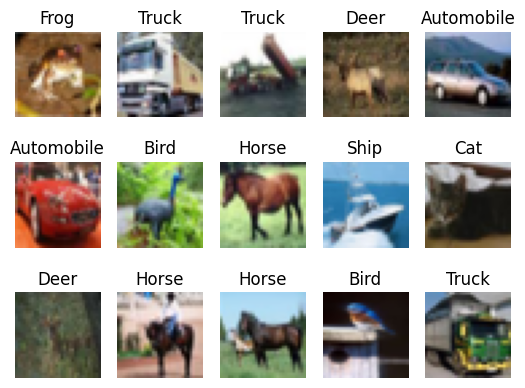

In [5]:
# Definir os nomes das classes para CIFAR-10
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Função para plotar um grid de imagens
def plot_images(images, labels, nrows, ncols):
    fig, axes = plt.subplots(nrows, ncols)
    for i, ax in enumerate(axes.flat):
        if i < len(images):
            # Mostrar a imagem
            ax.imshow(images[i])
            ax.set_title(class_names[labels[i][0]])
            ax.axis('off')
    plt.show()

# Plotar as primeiras 15 imagens do conjunto de treinamento
plot_images(x_train[:15], y_train[:15], 3, 5)

In [6]:
# Normalizar os dados
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Converter rótulos em categorias
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [7]:
x_train.shape

(2000, 32, 32, 3)

In [8]:
# Função para criar um modelo CNN
def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Dropout(0.25),

        Conv2D(64, (3, 3), activation='relu', padding='same'),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Dropout(0.25),

        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Criar três modelos com variações na arquitetura
model1 = create_model()
model2 = create_model()
model3 = create_model()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Treinar os modelos
model1.fit(x_train, y_train, epochs=10, verbose=1)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 207ms/step - accuracy: 0.1213 - loss: 2.2742
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 137ms/step - accuracy: 0.2361 - loss: 2.0123
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 137ms/step - accuracy: 0.3326 - loss: 1.8219
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 151ms/step - accuracy: 0.3484 - loss: 1.7367
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 124ms/step - accuracy: 0.3780 - loss: 1.6447
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 153ms/step - accuracy: 0.4336 - loss: 1.5168
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 151ms/step - accuracy: 0.4600 - loss: 1.4703
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 122ms/step - accuracy: 0.4468 - loss: 1.4477
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 136ms/step - accuracy: 0.5256 - loss: 1.3039
Epoch 10/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 152ms/step - accuracy: 0.5643 - loss: 1.2007


In [10]:
# Treinar os modelos
model2.fit(x_train, y_train, epochs=15, verbose=0)

In [11]:
# Treinar os modelos
model3.fit(x_train, y_train, epochs=20, verbose=0)

In [12]:
# Função para realizar previsões usando um ensemble de modelos
def ensemble_predict(models, data):
    # Lista para armazenar as previsões de cada modelo individual no ensemble
    predictions = [model.predict(data) for model in models]

    # Converte a lista de previsões em um array NumPy para facilitar operações de agregação
    predictions = np.array(predictions)

    # Calcula a média das previsões de cada modelo para cada amostra
    # 'axis=0' faz com que a média seja calculada ao longo da primeira dimensão (modelos),
    # deixando uma previsão média para cada amostra
    avg_predictions = np.mean(predictions, axis=0)

    # Encontra o índice da classe com a maior probabilidade média prevista para cada amostra
    # e retorna como a previsão final do ensemble
    return np.argmax(avg_predictions, axis=1)

# Lista de modelos que compõem o ensemble
models = [model1, model2, model3]

# Uso da função ensemble_predict para fazer previsões com o ensemble sobre o conjunto de teste
ensemble_predictions = ensemble_predict(models, x_test)

# Calcula a acurácia comparando as previsões do ensemble com as verdadeiras etiquetas do conjunto de teste
# np.argmax é usado para converter as probabilidades categorizadas de volta para o rótulo de classe original
ensemble_accuracy = accuracy_score(np.argmax(y_test, axis=1), ensemble_predictions)

# Exibe a acurácia do ensemble
print(f'Accuracy of the ensemble model: {ensemble_accuracy:.2f}%')


313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step
Accuracy of the ensemble model: 0.52%


In [13]:
# Simulando previsões de 3 modelos diferentes
# Cada array dentro da lista representa as previsões de um modelo para 3 amostras, e cada amostra tem 4 classes possíveis
predictions = [
    np.array([[0.1, 0.2, 0.6, 0.1],    # Previsões do Modelo 1
              [0.1, 0.7, 0.1, 0.1],
              [0.2, 0.3, 0.4, 0.1]]),
    np.array([[0.1, 0.4, 0.4, 0.1],    # Previsões do Modelo 2
              [0.2, 0.5, 0.2, 0.1],
              [0.3, 0.3, 0.3, 0.1]]),
    np.array([[0.2, 0.1, 0.5, 0.2],    # Previsões do Modelo 3
              [0.1, 0.6, 0.1, 0.2],
              [0.1, 0.2, 0.5, 0.2]])
]
# Convertendo a lista de previsões em um array NumPy para facilitar o processamento
predictions = np.array(predictions)
predictions

array([[[0.1, 0.2, 0.6, 0.1],
        [0.1, 0.7, 0.1, 0.1],
        [0.2, 0.3, 0.4, 0.1]],

       [[0.1, 0.4, 0.4, 0.1],
        [0.2, 0.5, 0.2, 0.1],
        [0.3, 0.3, 0.3, 0.1]],

       [[0.2, 0.1, 0.5, 0.2],
        [0.1, 0.6, 0.1, 0.2],
        [0.1, 0.2, 0.5, 0.2]]])

In [14]:
(0.1+0.1+0.2)/3

0.13333333333333333

In [15]:
# Calculando a média das previsões de cada modelo
avg_predictions = np.mean(predictions, axis=0)
avg_predictions

array([[0.13333333, 0.23333333, 0.5       , 0.13333333],
       [0.13333333, 0.6       , 0.13333333, 0.13333333],
       [0.2       , 0.26666667, 0.4       , 0.13333333]])

In [16]:
# Encontrando as classes com maior probabilidade média para cada amostra
final_predictions = np.argmax(avg_predictions, axis=1)
final_predictions

array([2, 1, 2])